# Linear Regression

The numeric value of each target is a linear combination of the k features of X, plus the β term to adjust the “baseline” value of the prediction.

![image](https://i.imgur.com/nTA4VCl.png)

Linear regression is a dot product:

![image](https://i.imgur.com/zRWIWKb.png)
![image](https://i.imgur.com/4333KIJ.png)

![image](https://i.imgur.com/etK7KG3.png)

Performing the matrix multiplication of this batch Xbatch with W gives a vector of predictions for the batch(forward pass):

![image](https://i.imgur.com/EwaXzSz.png)

Calculating the gradients allows us to update the wieghts in the backwards pass.

The math behind each step:

![image](https://i.imgur.com/z2jzROM.png)

## Second factor:

![image](https://i.imgur.com/P4tXTHT.png)
![image](https://i.imgur.com/xxFGERe.png)

![image](https://i.imgur.com/JK64EQG.png)


# Manual linear regression

In [1]:
import numpy as np
import pandas as pd
from numpy import ndarray
import matplotlib.pyplot as plt
from typing import Callable, Dict, Tuple, List

np.set_printoptions(precision=4)

In [2]:
from sklearn import datasets

iris = datasets.load_iris()
data = iris.data[:,[0]]
# print(data)
target = iris.data[:,[2]]
# print(target)
features = iris.feature_names

In [3]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
data = s.fit_transform(data)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=104)

y_train, y_test = y_train.reshape(-1, 1), y_test.reshape(-1, 1)


In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
TEST_ALL = False

# Examine the following functions used to build linear regression from scratch:

### Loss Gradient & Forward Loss:

In [6]:
def forward_loss(X, y, weights, bias):
    '''
    Generate predictions and calculate loss for a step-by-step linear regression
    (used mostly during inference).
    '''
    N = np.dot(X, weights)

    P = N + bias

    loss = np.mean(np.power(y - P, 2))

    return N, P, loss

In [7]:
def loss_gradients(N, P, X, y, weights, bias):
    '''
    Compute dLdW and dLdB for the step-by-step linear regression model.
    '''
    batch_size = X.shape[0]

    dLdP = -2 * (y - P)

    dPdN = np.ones_like(N)

    dPdB = np.ones_like(bias)

    dLdN = dLdP * dPdN

    dNdW = np.transpose(X, (1, 0))

    # need to use matrix multiplication here,
    # with dNdW on the left (see note at the end of last chapter)
    dLdW = np.dot(dNdW, dLdN)

    # need to sum along dimension representing the batch size:
    # see note near the end of the chapter
    dLdB = (dLdP * dPdB).sum(axis=0)

    weights = dLdW
    bias= dLdB

    return weights, bias

### Helpers:

In [8]:
def init_weights(n_in):
    '''
    Initialize weights on first forward pass of model.
    '''
    W = np.random.randn(n_in, 1)
    B = np.random.randn(1, 1)

    return W,B

In [9]:
def init_weights_ones(n_in):
    W = np.ones((n_in, 1))
    B = np.ones((1, 1))

    return W,B


In [13]:
def generate_batch(X, y, start=0, batch_size=10):
    '''
    Generate batch from X and y, given a start position
    '''
    if start+batch_size > X.shape[0]:
        batch_size = X.shape[0] - start

    X_batch, y_batch = X[start:start+batch_size], y[start:start+batch_size]

    return X_batch, y_batch

## Using the code snippets in the blocks given below, arrange them in the proper order to run the linear regression model. You will have to copy the code from the blocks and paste them into the code block with the for loop.

##NOTE: All code snippets will go inside the same codeblock as the for loop, but not all snippets are meant to go inside the loop itself. It is up to you to determine the location for all snippets.

#LR Code Blocks:


In [11]:
# Calculate gradient
W, B = loss_gradients(N,P, X_batch, y_batch, weights, bias)

NameError: name 'N' is not defined

In [ ]:
#Initialize Variables
X=X_train
y=y_train
n_iter = 1000
learning_rate = 0.001
batch_size = 100
start = 0
losses = []

In [ ]:
#GenerateBatch
if start >= X.shape[0]:
      # X, y = permute_data(X, y)
      start = 0
X_batch, y_batch = generate_batch(X, y, start, batch_size)
start += batch_size

In [ ]:
# Initialize weights
weights, bias = init_weights(X.shape[1])

#Deterministic weight initialization
# weights, bias = init_weights_ones(X.shape[1])

In [ ]:
#Update the weights
weights -=learning_rate * W
bias -= learning_rate * B

In [ ]:
# Calculate forward loss
N, P, loss = forward_loss(X_batch, y_batch, weights, bias)
losses.append(loss)

# For loop block to paste the code:

In [34]:
#Initialize Variables
X=X_train
y=y_train
n_iter = 1000
learning_rate = 0.0001 #have changed this because the graph looked different than asked one
batch_size = 100
start = 0
losses = []
#Initialize weights
weights, bias = init_weights(X.shape[1])


for i in range(n_iter):
    #GenerateBatch
    if start >= X.shape[0]:
      # X, y = permute_data(X, y)
        start = 0
    X_batch, y_batch = generate_batch(X, y, start, batch_size)
    start += batch_size
    # Calculate forward loss
    N, P, loss = forward_loss(X_batch, y_batch, weights, bias)
    losses.append(loss)
    # Calculate gradient
    W, B = loss_gradients(N,P, X_batch, y_batch, weights, bias)
    #Update the weights
    weights -=learning_rate * W
    bias -= learning_rate * B


#Analysis

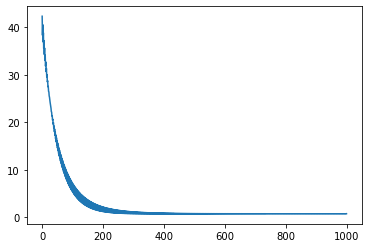

In [35]:
plt.plot(list(range(1000)), losses);

## Function to predict from the weights of the trained LR model:

In [36]:
def predict(X, weights, bias):
    '''
    Generate predictions from the step-by-step linear regression model.
    '''

    N = np.dot(X, weights)

    return N + bias

## Generate predictions and calculate error:

In [37]:
preds = predict(X_test, weights,bias)

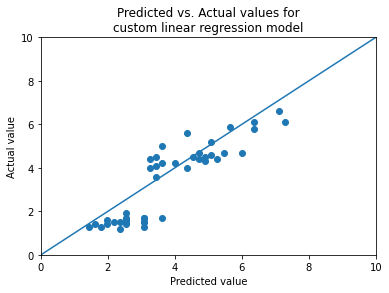

In [38]:
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Predicted vs. Actual values for\ncustom linear regression model");
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.scatter(preds, y_test)
plt.plot([0, 10], [0, 10]);
